<a href="https://colab.research.google.com/github/mjkm97/03.-ML-Model-Time-Series-Sales-Prediction/blob/main/ML_Project_(1)_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA, 탐색적 데이터 분석

In [ ]:
# 데이터 경로 지정 및 읽어오기
import pandas as pd
data_path = '/content/train_store.csv'

# Define your column names as a list

custom_column_names = ['Store',
                       'DayOfWeek',
                       'Date',
                       'Year',
                       'Month',
                       'Day',
                       'Sales',
                       'Customers',
                       'Open',
                       'Promo',
                       'StateHoliday',
                       'SchoolHoliday',
                       'StoreType',
                       'Assortment'	,
                       'CompetitionDistance',
                       'CompetitionOpenSinceMonth',
                       'CompetitionOpenSinceYear',
                       'Promo2',
                       'Promo2SinceWeek',
                       'Promo2SinceYear',
                       'PromoInterval']

# Load the CSV with custom column names
df = pd.read_csv(data_path, header=0, names=custom_column_names)

# Print the column names
print(df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Day', 'Sales',
       'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


<ipython-input-5-d04c256ecbd8>:30: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, header=0, names=custom_column_names)


In [ ]:
df[['Promo','Promo2', 'PromoInterval']].head() # Enclose column names in a list

,Promo,Promo2,PromoInterval
0,1,0,0
1,1,1,"Jan,Apr,Jul,Oct"
2,1,1,"Jan,Apr,Jul,Oct"
3,1,0,0
4,1,0,0


In [ ]:
df[['Store', 'Open','CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth','CompetitionDistance']].head() # Enclose column names in a list

,Store,Open,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionDistance
0,1,1,2008,9,1270
1,2,1,2007,11,570
2,3,1,2006,12,14130
3,4,1,2009,9,620
4,5,1,2015,4,29910


In [ ]:
import numpy as np

seed = 1234
np.random.seed(seed)

In [ ]:
pd.set_option('future.no_silent_downcasting', True)
df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1})

print(df['StoreType'].unique())
print(df['Assortment'].unique())
print(df['StateHoliday'].unique())
print(df['SchoolHoliday'].unique())
print(df['DayOfWeek'].unique())
print(df['Month'].unique())
print(df['Promo'].unique())
print(df['Promo2'].unique())

['c' 'a' 'd' 'b']
['a' 'c' 'b']
[0 1]
[1 0]
[5 4 3 2 1 7 6]
[ 7  6  5  4  3  2  1 12 11 10  9  8]
[1 0]
[0 1]


In [ ]:
df['StateHoliday'].astype(int)

,StateHoliday
0,0
1,0
2,0
3,0
4,0
...,...
441286,0
441287,0
441288,0
441289,0


In [ ]:
df['StateHoliday'].unique()

array([0, 1], dtype=object)

In [ ]:
df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Year,int64
Month,int64
Day,int64
Sales,int64
Customers,int64
Open,int64
Promo,int64


## 데이터 로드

## 기본 분석 및 기초 통계 분석

In [ ]:
# 기본 정보
print('#'*20, '기본 정보', '#'*20)
df.info() # info() 안에서 자동으로 print를 진행

# 기초 통계량
summary_statistics = df.describe(include='all')
print('#'*20, '기초 통계량', '#'*20)
print(summary_statistics)

#################### 기본 정보 ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441291 entries, 0 to 441290
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      441291 non-null  int64  
 1   DayOfWeek                  441291 non-null  int64  
 2   Date                       441291 non-null  object 
 3   Year                       441291 non-null  int64  
 4   Month                      441291 non-null  int64  
 5   Day                        441291 non-null  int64  
 6   Sales                      441291 non-null  int64  
 7   Customers                  441291 non-null  int64  
 8   Open                       441291 non-null  int64  
 9   Promo                      441291 non-null  int64  
 10  StateHoliday               441291 non-null  object 
 11  SchoolHoliday              441291 non-null  int64  
 12  StoreType                  441291 non-

## 수치형 데이터 분석

[1 0]


<Figure size 2000x600 with 0 Axes>

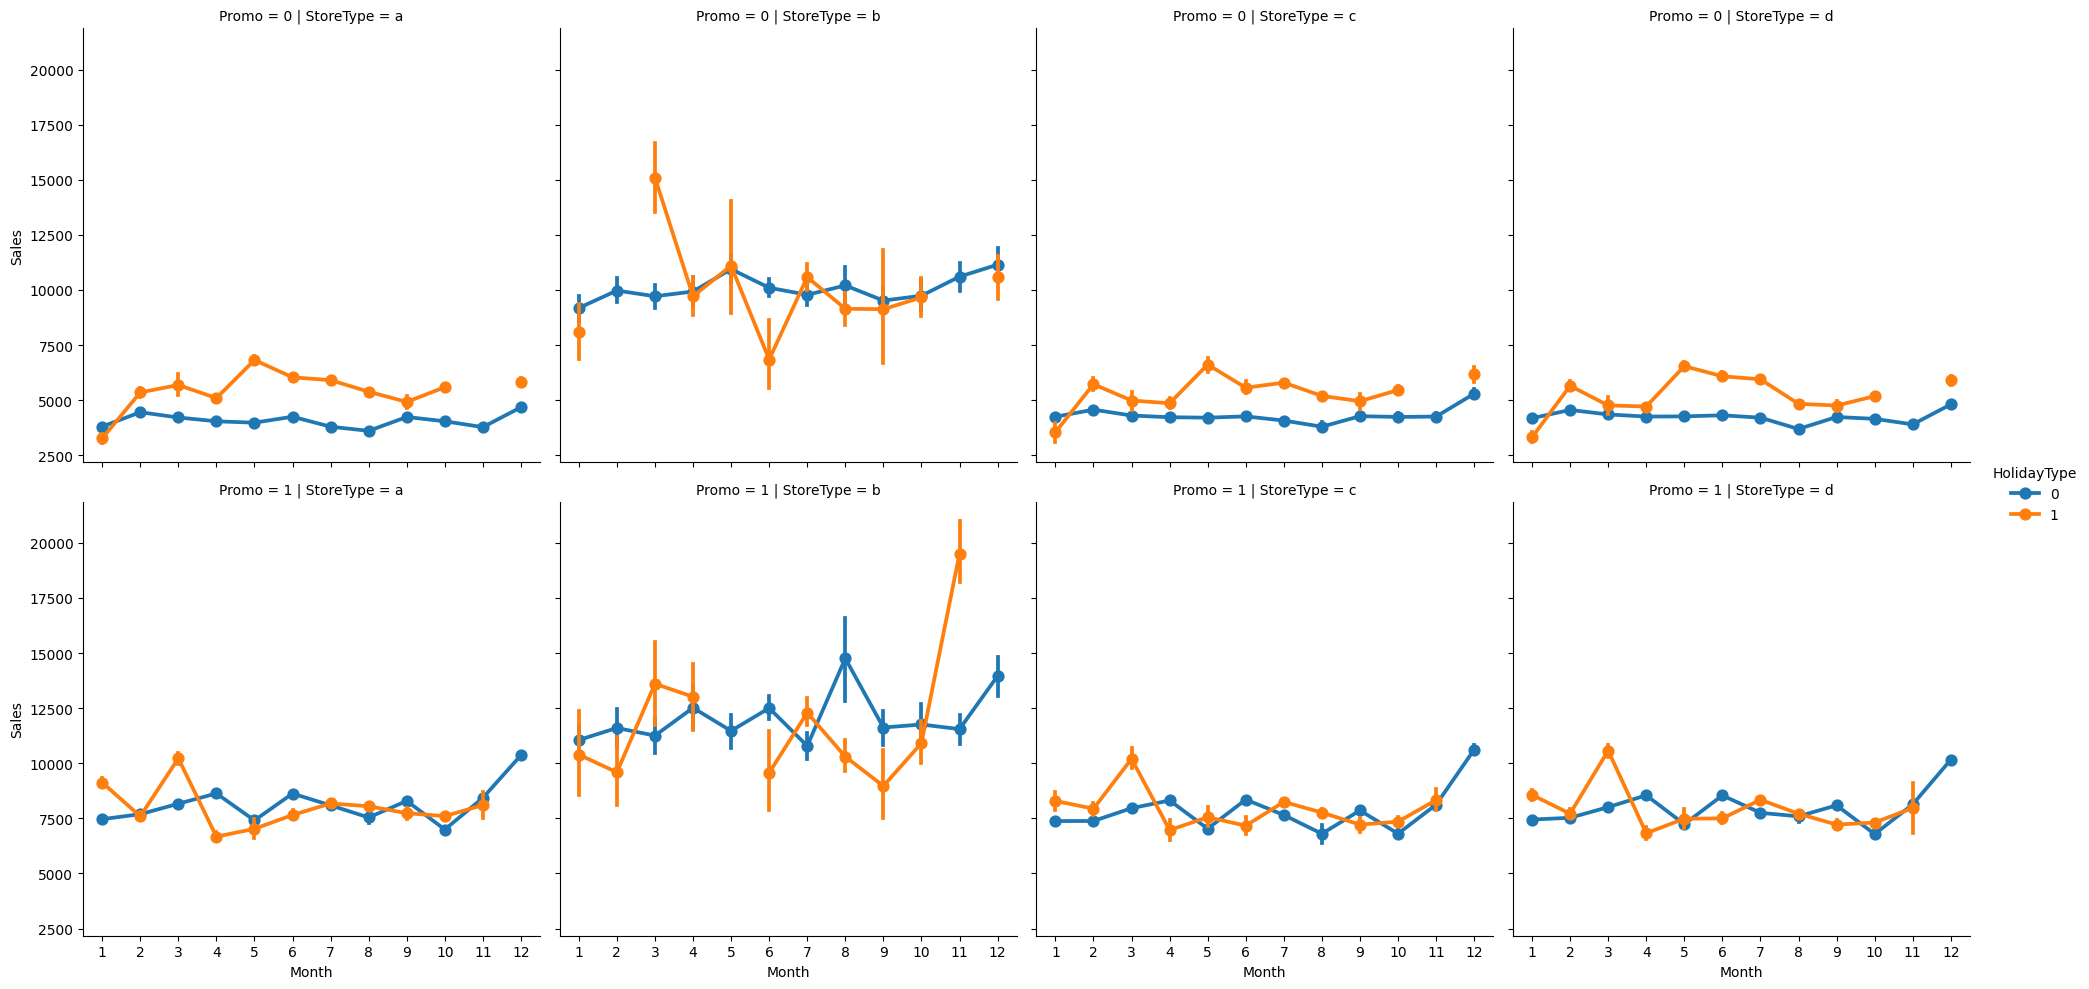

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Create a copy of the DataFrame
df_modified = df.copy()

# Now, make changes to the copied DataFrame
df_modified['HolidayType'] = 0  # Initialize with 0, representing no holiday
df_modified.loc[df_modified['SchoolHoliday'] == 1, 'HolidayType'] = 1
df_modified.loc[(df_modified['SchoolHoliday'] == 1) & (df_modified['StateHoliday'] == 1), 'HolidayType'] = 1
df_modified = df_modified.drop(['SchoolHoliday', 'StateHoliday'], axis=1)

#Sales Distribution of Each Store Types(Promo)
sns.catplot(data=df_modified, x='Month', y="Sales",
            col='StoreType',
            hue='HolidayType',
            row='Promo',
            kind='point',
            col_order=['a', 'b', 'c', 'd'])  # Specify the desired order for StoreType


plt.show()

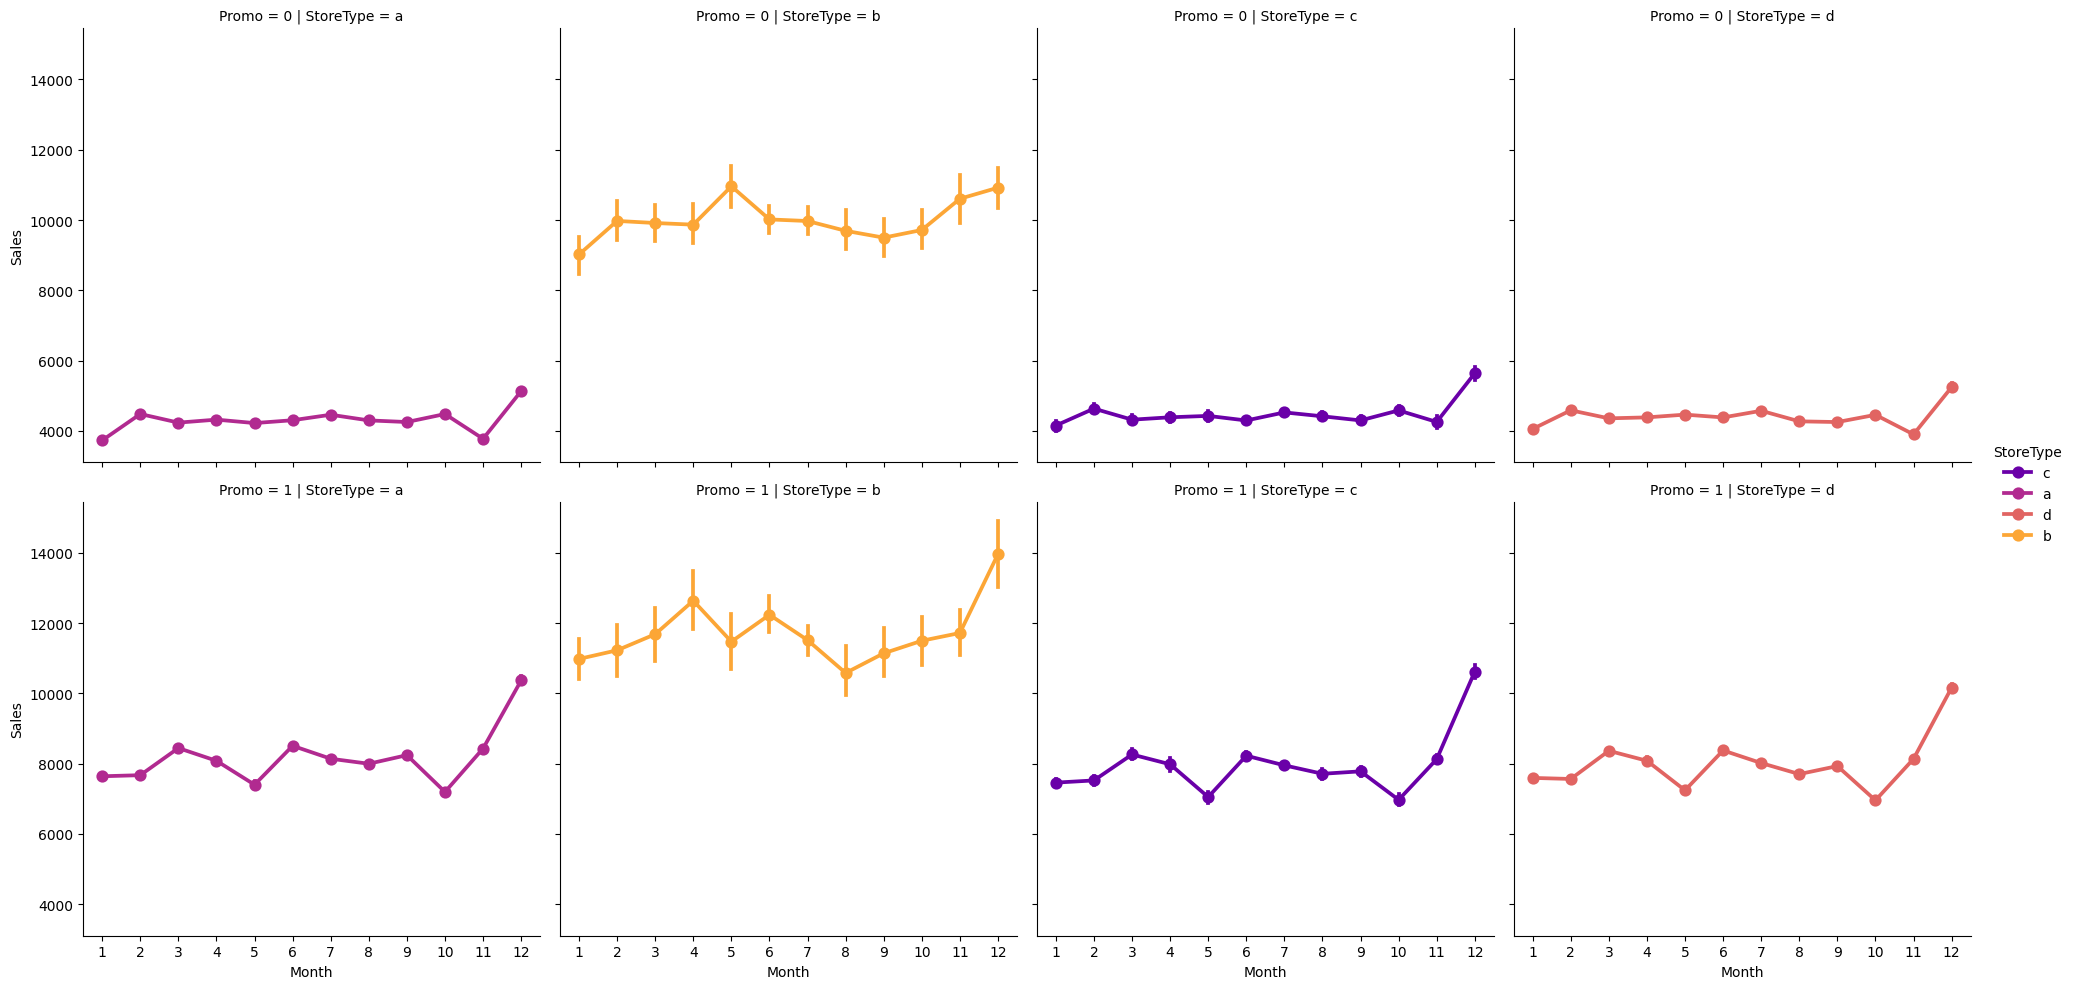

In [ ]:
# sales trends
sns.catplot(data = df, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               kind='point',
               col_order=['a', 'b', 'c', 'd']) # Use kind='point' for similar functionality to factorplot

### 분포 확인

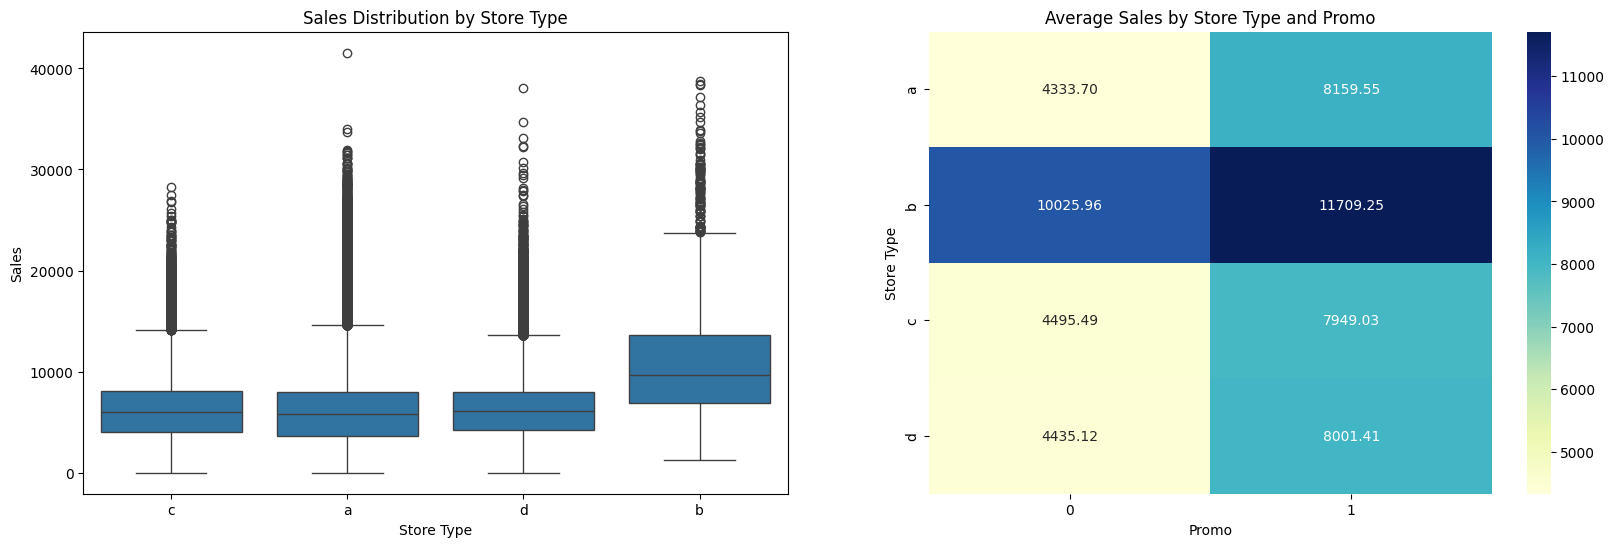

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))


# Sales Distribution by Store Type
plt.subplot(1, 2, 1)
sns.boxplot(x='StoreType', y='Sales', data=df)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')

# 스토어 타입과 프로모 분포
plt.subplot(1, 2, 2)
store_type_promo_sales = pd.crosstab(df['StoreType'], df['Promo'], values=df['Sales'], aggfunc='mean')
sns.heatmap(store_type_promo_sales, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Sales by Store Type and Promo')
plt.xlabel('Promo')
plt.ylabel('Store Type')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 프로모션 진행 여부를 나타내는 새로운 열 생성
df['Promo_Running'] = df['Promo'].apply(lambda x: 1 if x == 1 else 0)

# 2. StoreType별로 평균 프로모션 빈도 계산
promo_frequency = df.groupby('StoreType')['Promo_Running'].mean().reset_index()

# 3. 결과 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Promo_Running', data=promo_frequency)
plt.title('Average Promo Frequency by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Promo Frequency')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 프로모션 진행 여부를 나타내는 새로운 열 생성
df['Promo_Running'] = df['Promo'].apply(lambda x: 1 if x == 1 else 0)

# 2. StoreType별로 평균 프로모션 빈도 계산
promo_frequency = df.groupby('StoreType')['Promo_Running'].mean().reset_index()

# 3. 결과 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Promo_Running', data=promo_frequency)
plt.title('Average Promo Frequency by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Promo Frequency')
plt.show()

<ipython-input-33-0a767a85de67>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['StoreType']==a]['Sales'] for a in df['StoreType'].unique()], labels=df['StoreType'].unique())
<ipython-input-33-0a767a85de67>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Assortment']==a]['Sales'] for a in df['Assortment'].unique()], labels=df['Assortment'].unique())
<ipython-input-33-0a767a85de67>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['StateHoliday']==h]['Sales'] for h in df['StateHoliday'].unique()], labels=df['StateHoliday'].unique())
<ipython-input-33-0a767a85

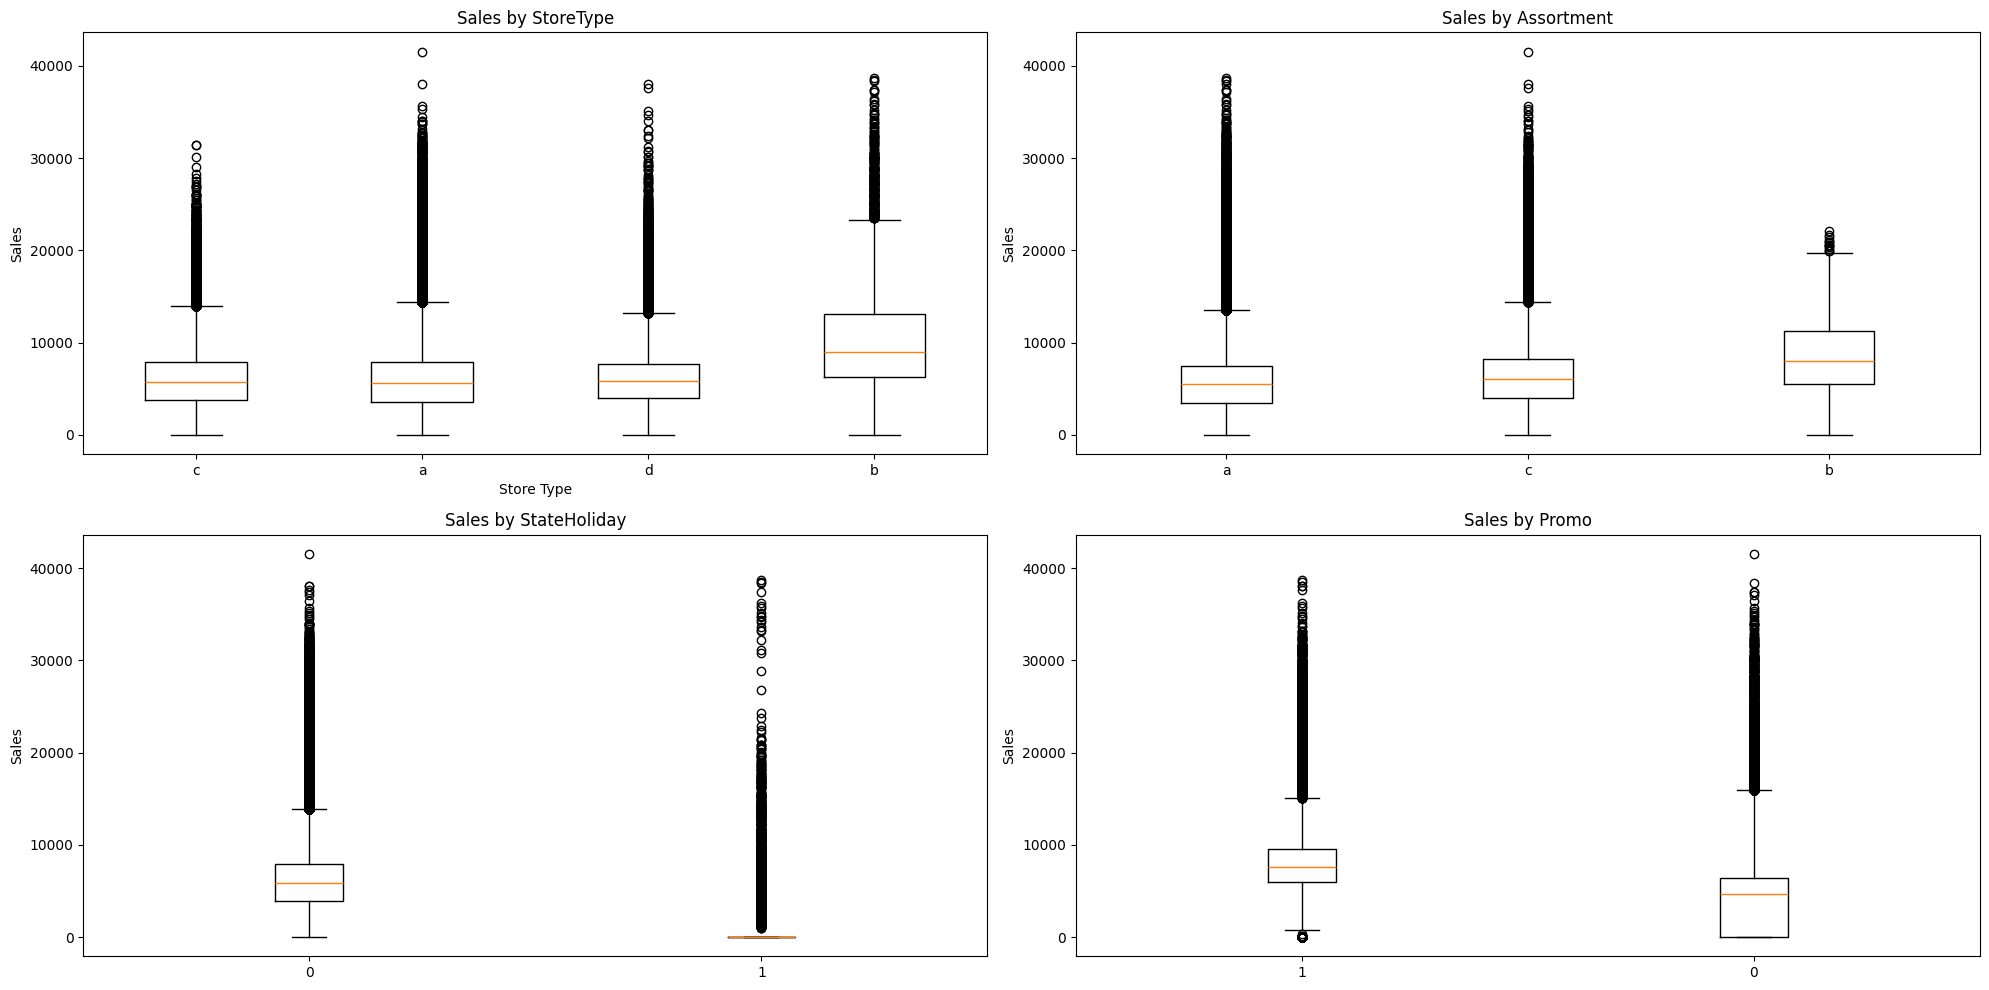

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# StoreType 별 매출
store_types = sorted(df['StoreType'].unique())

plt.subplot(2, 2, 1)
plt.boxplot([df[df['StoreType']==a]['Sales'] for a in df['StoreType'].unique()], labels=df['StoreType'].unique())
plt.title('Sales by StoreType')
plt.ylabel('Sales')
plt.xlabel('Store Type')

# Assortment 별 매출
plt.subplot(2, 2, 2)
plt.boxplot([df[df['Assortment']==a]['Sales'] for a in df['Assortment'].unique()], labels=df['Assortment'].unique())
plt.title('Sales by Assortment')
plt.ylabel('Sales')

# StateHoliday 별 매출
plt.subplot(2, 2, 3)
plt.boxplot([df[df['StateHoliday']==h]['Sales'] for h in df['StateHoliday'].unique()], labels=df['StateHoliday'].unique())
plt.title('Sales by StateHoliday')
plt.ylabel('Sales')


# Promo별 매출
plt.subplot(2, 2, 4)
plt.boxplot([df[df['Promo'] == p]['Sales'] for p in df['Promo'].unique()],
            labels=df['Promo'].unique())
plt.title('Sales by Promo')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()
